# Week 8 Jupyter Notebook | K-Nearest Neighbor

In [ ]:
# Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('dataset_phishin.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

(None,
                                                  url  length_url  \
 0              http://www.crestonwood.com/router.php          37   
 1  http://shadetreetechnology.com/V4/validation/a...          77   
 2  https://support-appleld.com.secureupdate.duila...         126   
 3                                 http://rgipt.ac.in          18   
 4  http://www.iracing.com/tracks/gateway-motorspo...          55   
 
    length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
 0               19   0        3           0      0      0       0      0  ...   
 1               23   1        1           0      0      0       0      0  ...   
 2               50   1        4           1      0      1       2      0  ...   
 3               11   0        2           0      0      0       0      0  ...   
 4               15   0        2           2      0      0       0      0  ...   
 
    domain_in_title  domain_with_copyright  whois_registered_domain  \
 0          

In [3]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Preprocessing

In [1]:


# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("dataset_phishin.csv")


# 3. Drop unnecessary columns
# 'url' is a string column not useful for modeling
df = df.drop(columns=['url'])

# Check target variable distribution
print("\nTarget Variable Counts:")
print(df['status'].value_counts())

# 4. Encode target variable
# Map phishing to 1 and legitimate to 0
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

# Separate features (X) and target (y)
X = df.drop(columns=['status'])
y = df['status']

# 5. Scale features (KNN is distance-based)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Target Variable Counts:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64
Training set shape: (9144, 87)
Testing set shape: (2286, 87)


# KNN Modeling & Distance Metric Commparison

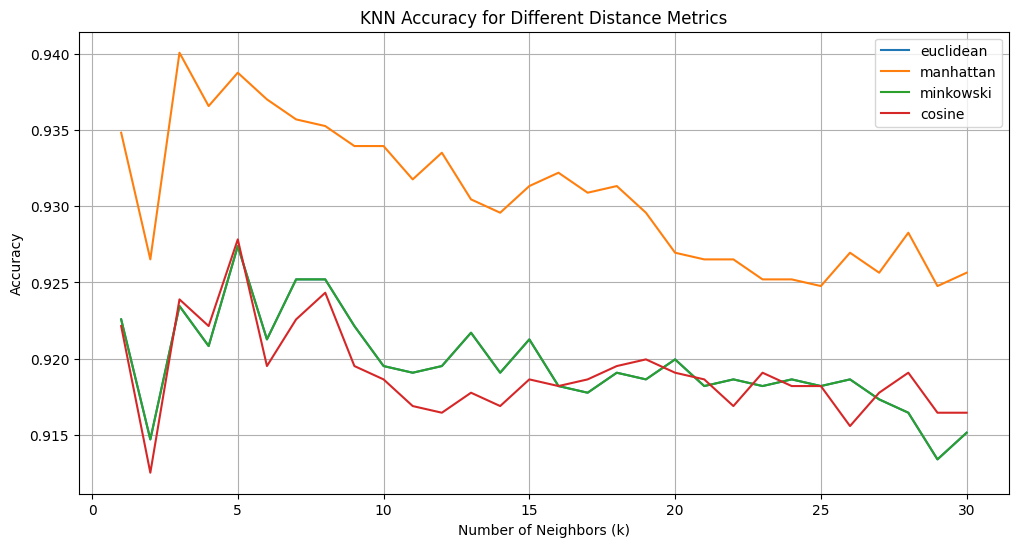

Best Metric: manhattan
Best k: 3
Accuracy: 0.9401
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1143
           1       0.94      0.94      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



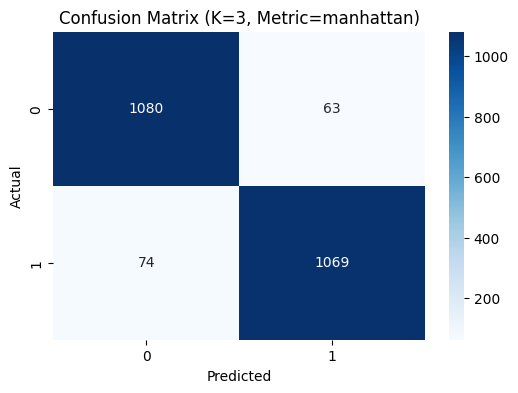

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define metrics to test
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
k_values = range(1, 31)

results = {}

# Loop through distance metrics and k values
for metric in distance_metrics:
    accuracy_list = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, y_pred))
    results[metric] = accuracy_list

# Plot accuracy for each metric
plt.figure(figsize=(12, 6))
for metric in distance_metrics:
    plt.plot(k_values, results[metric], label=f"{metric}")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()

# Find best metric and k combination
best_metric = None
best_k = None
best_acc = 0

for metric in distance_metrics:
    max_acc = max(results[metric])
    k_at_max = k_values[results[metric].index(max_acc)]
    if max_acc > best_acc:
        best_acc = max_acc
        best_metric = metric
        best_k = k_at_max

print(f"Best Metric: {best_metric}")
print(f"Best k: {best_k}")
print(f"Accuracy: {best_acc:.4f}")

# Train final model with best metric and k
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn.fit(X_train, y_train)
final_pred = final_knn.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, final_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K={best_k}, Metric={best_metric})")
plt.show()


## Vizualizations

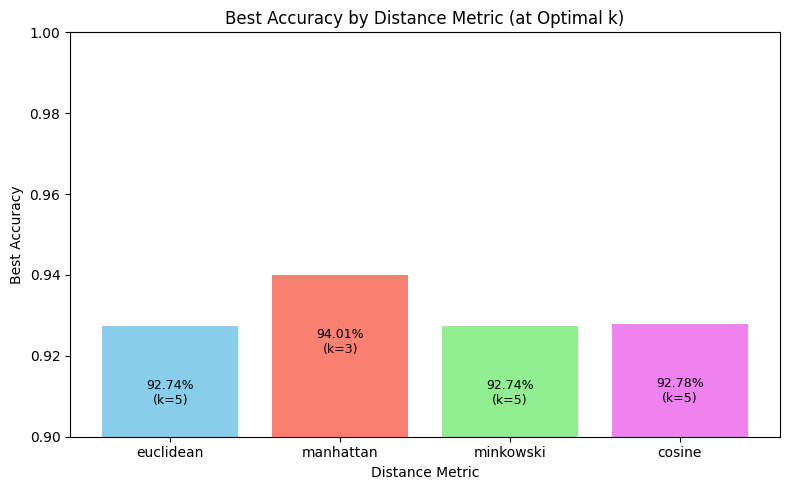

In [ ]:

# 2️⃣ Identify best k for each metric for summary plot
best_k_per_metric = {metric: k_values[results[metric].index(max(results[metric]))] for metric in distance_metrics}
best_acc_per_metric = {metric: max(results[metric]) for metric in distance_metrics}

# 3️⃣ Bar Plot – Best Accuracy by Metric (at its optimal k)
plt.figure(figsize=(8, 5))
bars = plt.bar(best_acc_per_metric.keys(), best_acc_per_metric.values(), color=['skyblue', 'salmon', 'lightgreen', 'violet'])
plt.xlabel("Distance Metric")
plt.ylabel("Best Accuracy")
plt.title("Best Accuracy by Distance Metric (at Optimal k)")

# Annotate bars with accuracy and k
for bar, metric in zip(bars, best_acc_per_metric.keys()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.02,
             f"{height:.2%}\n(k={best_k_per_metric[metric]})",
             ha='center', va='bottom', fontsize=9, color='black')

plt.ylim(0.9, 1)  # tighten y-axis for better visual clarity
plt.tight_layout()
plt.show()


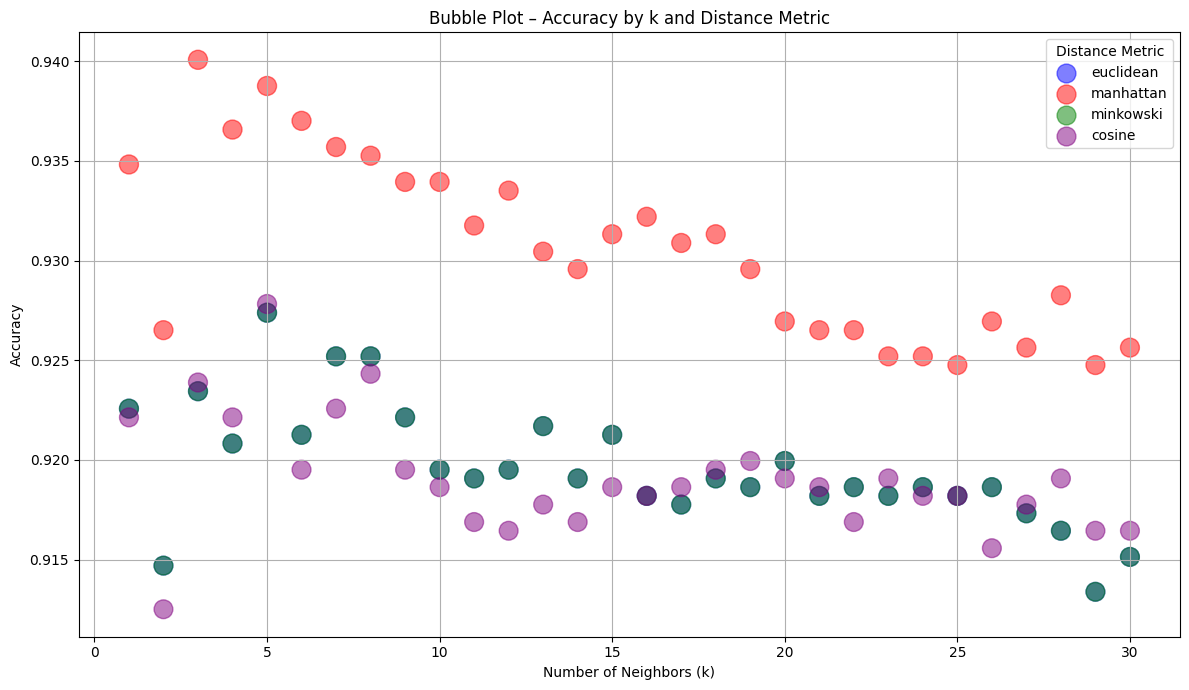

In [ ]:

# Bubble Plot: Accuracy by k & Distance Metric

plt.figure(figsize=(12, 7))

# Loop through each metric and plot bubbles
colors = {'euclidean': 'blue', 'manhattan': 'red', 'minkowski': 'green', 'cosine': 'purple'}

for metric in distance_metrics:
    plt.scatter(
        x=k_values,
        y=results[metric],
        s=[acc*200 for acc in results[metric]],  # bubble size scaled by accuracy
        alpha=0.5,
        label=metric,
        color=colors[metric]
    )

plt.title("Bubble Plot – Accuracy by k and Distance Metric")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend(title="Distance Metric")
plt.grid(True)
plt.tight_layout()
plt.show()


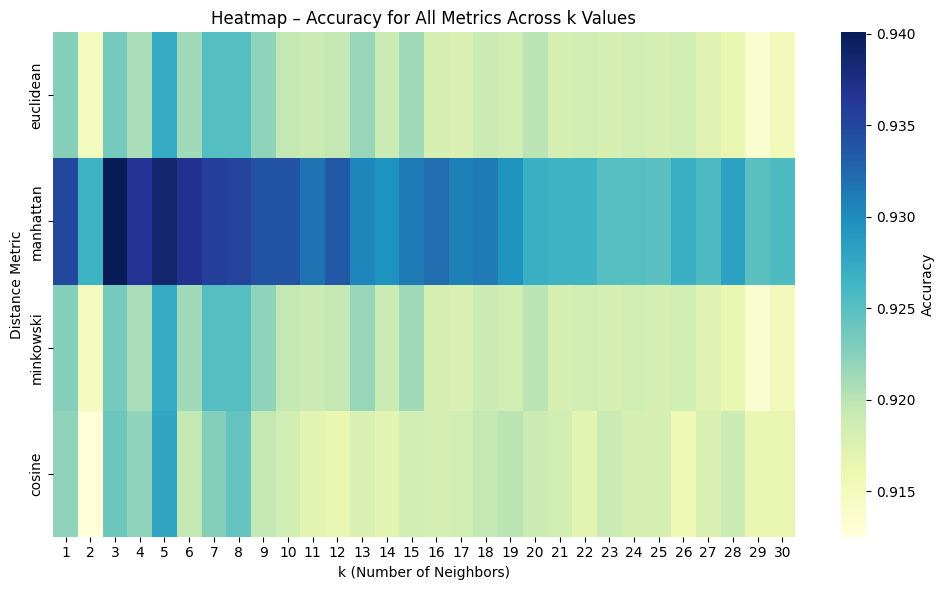

In [ ]:

# Heatmap: Accuracy Grid

import pandas as pd

# Convert results dict into DataFrame for heatmap
results_df = pd.DataFrame(results, index=k_values)

plt.figure(figsize=(10, 6))
sns.heatmap(results_df.T, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Accuracy'})
plt.title("Heatmap – Accuracy for All Metrics Across k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Distance Metric")
plt.tight_layout()
plt.show()


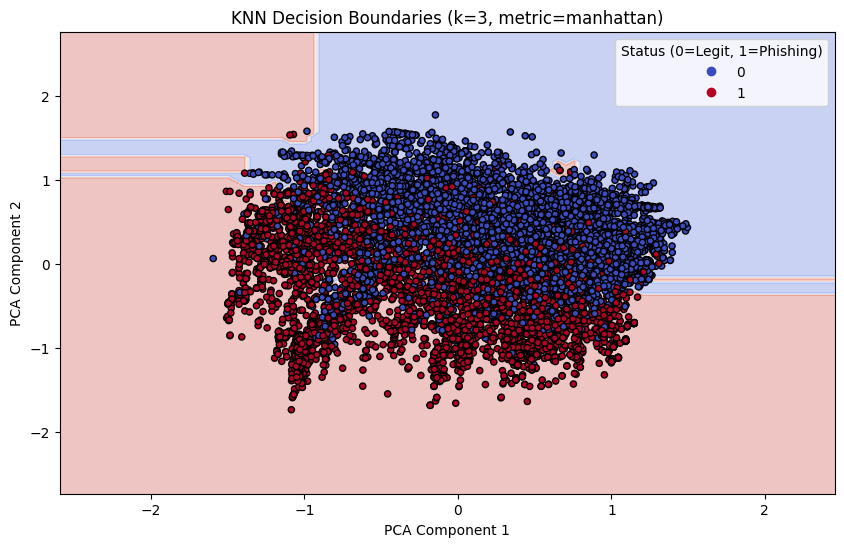

In [14]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train final KNN on reduced data (using best_k & best_metric)
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_pca.fit(X_pca, y)

# Plot decision boundaries
h = .05  # step size in mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
plt.title(f"KNN Decision Boundaries (k={best_k}, metric={best_metric})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Status (0=Legit, 1=Phishing)")
plt.show()


For Week 8, I implemented the K-Nearest Neighbors (KNN) algorithm to classify URLs in the phishing dataset as either phishing or legitimate. I began by preprocessing the data: dropping the raw url column, encoding the target variable with a simple map (phishing = 1, legitimate = 0) instead of using a LabelEncoder since there were only two clear categories, and then scaling all numeric features with MinMaxScaler. Scaling was essential because KNN relies on distance calculations, and unscaled features (like URL length in the hundreds versus binary flags) would have skewed the model’s performance. Since the dataset was already balanced (5,715 phishing and 5,715 legitimate URLs), I didn’t need to use any balancing techniques such as SMOTE. I then trained KNN models across four distance metrics Euclidean, Manhattan, Minkowski, and Cosine testing k values from 1 through 30 for each, resulting in 120 model variations. The analysis showed that the Manhattan metric with k = 3 performed best, achieving an accuracy of 94.01%, with precision at 94.43%, recall at 93.53%, and an F1-score of 93.98%. To visualize and interpret the results, I created a bar plot to compare the best accuracy for each metric, a bubble plot to show accuracy trends across all k values, a heatmap to display the full metric/k accuracy grid, and a PCA-based decision boundary plot to illustrate how KNN separates phishing and legitimate URLs in a simplified 2D space. These steps confirmed that the Manhattan metric with k = 3 was the most effective configuration for this dataset and provided a clear understanding of how KNN classified phishing URLs with high reliability